In [ ]:
#!pip install inductiva

# Mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

import inductiva 

inductiva.working_dir = "/content/gdrive/MyDrive/API_Tutorials/Intro_To_Simulators"

In [1]:
import inductiva

# Explore the design space of the simulation

Imagine that you want to change some parameters of the input file or want to do a search on the design space. We here provide a clean way for you to do so.

It is based on creating an input template file and adding in place of the simulator parameters a tag.

For the SWASH example,we create a template file based in the input file. It looks as follows:





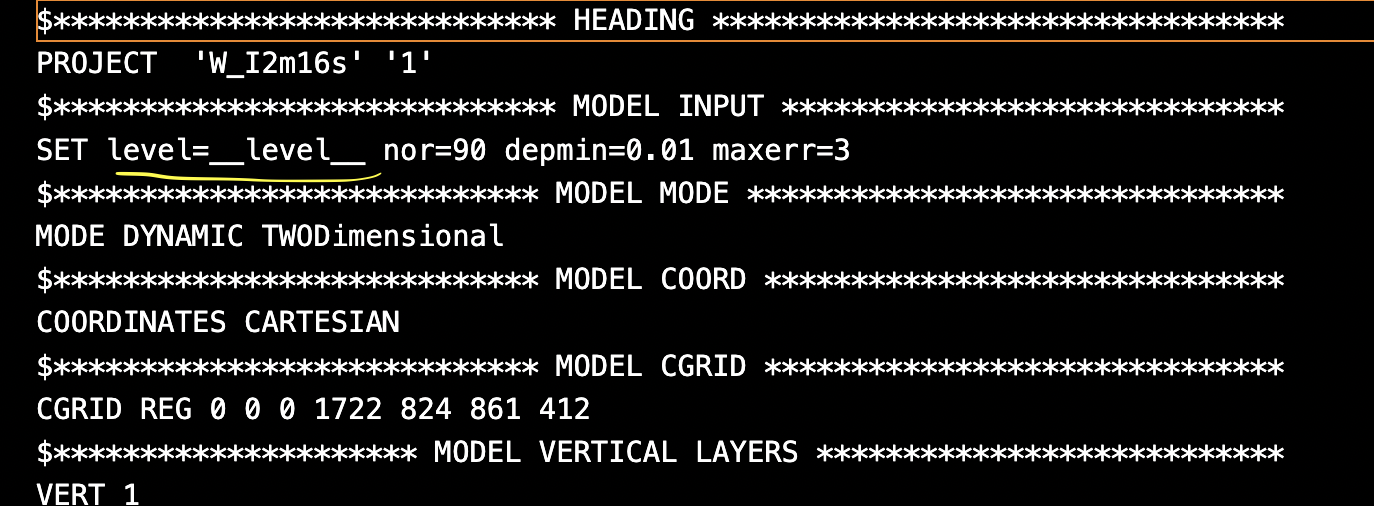

Here, we are able to explore the design space of the `level` parameter! For such, the user adds a tag `__level__` to identify the place where we want now to make a substitution automatically!

The input files are created automatically from the template file and many simulations can be setup on this way! At this point in time, we are setting up a method to send all of these simulations at once and run them all at the same time in parallel. Keep an eye on us for updates!

Let's proceed to demonstrate how to explore the design space!

## Prepare template files

In [2]:
# Set the input directories; input files and template file.
input_dir = "configs"
input_filename = "template.sws"

## Setup the exploration space: manually or randomly

Here, you can set up the parameters you want the change, or just search through the search space randomly!

In [3]:
import numpy as np

# Manual setup
manual_design_parameters = [3., 3.5, 4., 4.5]

# Randomly set up your design space
random_design_parameters = np.random.uniform(2., 5., 4)
print(random_design_parameters)

[4.1810117  3.06873529 2.85568086 2.6709803 ]


## Explore automatically

First, we create a simple function to iterate over a set of design parameters.

This is done locally and you are the one defining your own tags and writing the template file as you already know how to do! 

Then, one can use a function like to set the tags on the assignment argument, which writes the input file on our side and runs an accelerated simulation automatically! This provides an overview of what can then be afterwards accomplished all via the API in one call! 

In [ ]:
from inductiva.design import explore_design_space

sim = inductiva.fluids.SWASH()

explore_design_space(
  simulator=sim,
  input_dir=input_dir,
  template_filename=input_filename,
  tag="level",
  values=manual_design_parameters,
  n_cores=12,
)



Let's iterate over the manual parameters:

In [ ]:
explore_design_space(input_directory, input_file, template_path,
                     "__level__", manual_design_parameters)

Now over the random generated parameters:

In [ ]:
explore_design_space(input_directory, input_file, template_path,
                     "__level__", random_design_parameters)

On your google drive, there is now a folder named `"outputs"` which contains a folder for each of the simulations ran during the exploration.

# Takeway: Simple and fast exploration via Inductiva API